In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

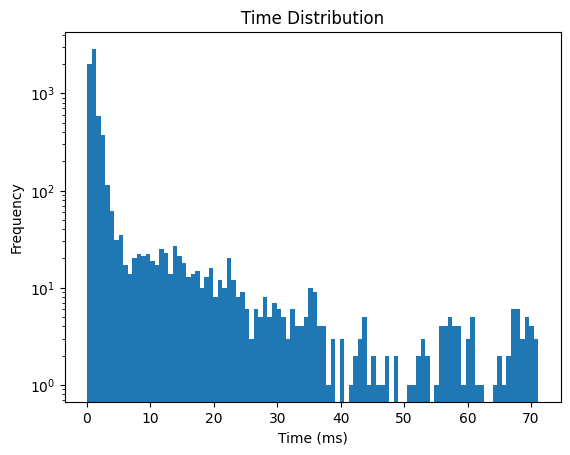

In [26]:
df = pd.read_csv('py_time.csv')

# restrict df['time'] to .99th percentile
df['time'] = df['time'][df['time'] < np.percentile(df['time'], 99)]

# plot distribution of times 
plt.hist(df['time'], bins=100, log=True)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
plt.title('Time Distribution')
plt.show()

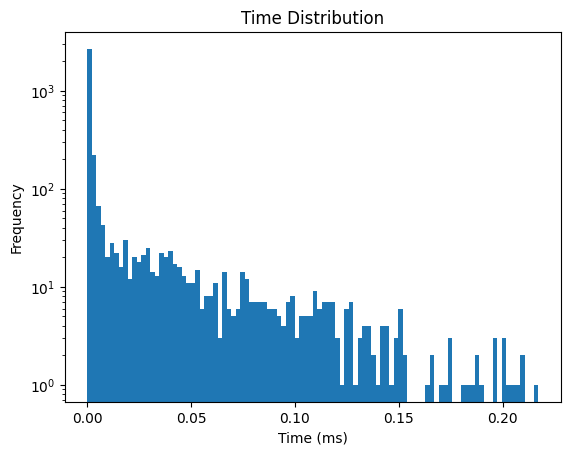

In [27]:
df = pd.read_csv('jl_time.csv')

# restrict df['time'] to .99th percentile
df['time'] = df['time'][df['time'] < np.percentile(df['time'], 99)]

# plot distribution of times 
plt.hist(df['time'], bins=100, log=True)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
plt.title('Time Distribution')
plt.show()